In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ads-optimization/Ads_CTR_Optimisation.csv
/kaggle/input/dataset/abou_data.PNG
/kaggle/input/thompson/tamson.PNG
/kaggle/input/algorithm/algorithm.PNG


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1. How the Upper Confidence Bound Algorithm Works?

In [3]:
df=pd.read_csv("../input/ads-optimization/Ads_CTR_Optimisation.csv")
df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


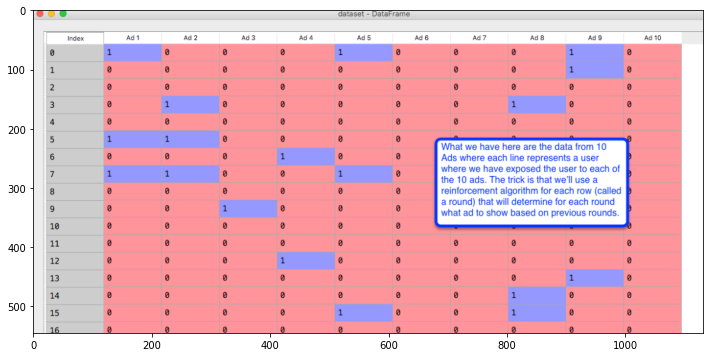

In [4]:

plt.figure(figsize=(12,10))
plt.imshow(plt.imread("../input/dataset/abou_data.PNG"))


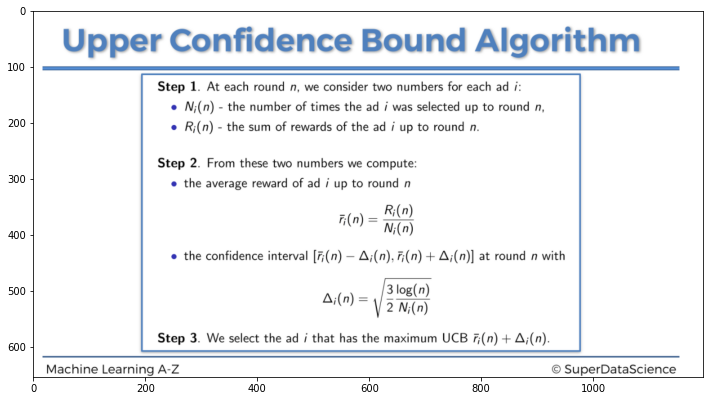

In [5]:
plt.figure(figsize=(12,10))
plt.imshow(plt.imread("../input/algorithm/algorithm.PNG"))

In [6]:
import math
N = 10000 #Number of instances we have 10000 in our dataset
d = 10 #Full list of ads that are selected over the rounds, it will start from 0 and gets bigger and will be 10000 at the end
ads_selected = [] #numbers of rime each ad is selected, it is is initilaized
numbers_of_selections = [0] * d # sums of rewards of the ad i to round n
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = df.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

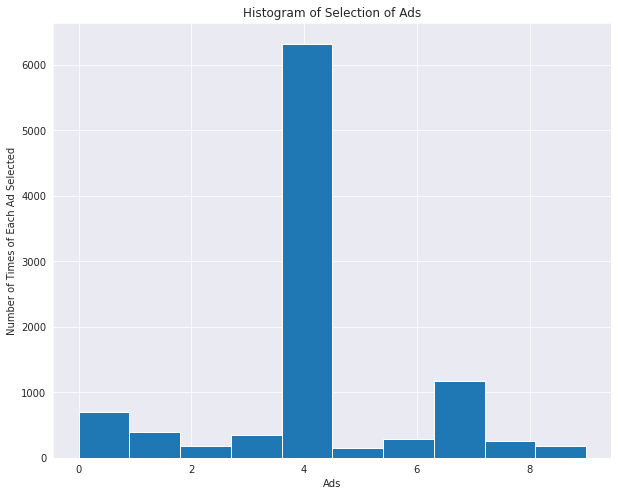

In [7]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
plt.hist(ads_selected)
plt.title("Histogram of Selection of Ads")
plt.xlabel("Ads")
plt.ylabel("Number of Times of Each Ad Selected")
plt.show()

<font color="blue">
It seem apparently that the 4.th app has the highest change to be clicked by the custtomers

<font color="red">
Now we will play with the number of rounds, instead of using 10 000, we will try 1000 and 500 samples in order to find out the performance of the algorithm and necessary numbers of rounds to figure out required numbers of round for algorithm's least required performance

In [8]:
N = 1000 #Number of instances we have 1000 in our dataset
d = 10 #Full list of ads that are selected over the rounds, it will start from 0 and gets bigger and will be 10000 at the end
ads_selected = [] #numbers of rime each ad is selected, it is is initilaized
numbers_of_selections = [0] * d # sums of rewards of the ad i to round n
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = df.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

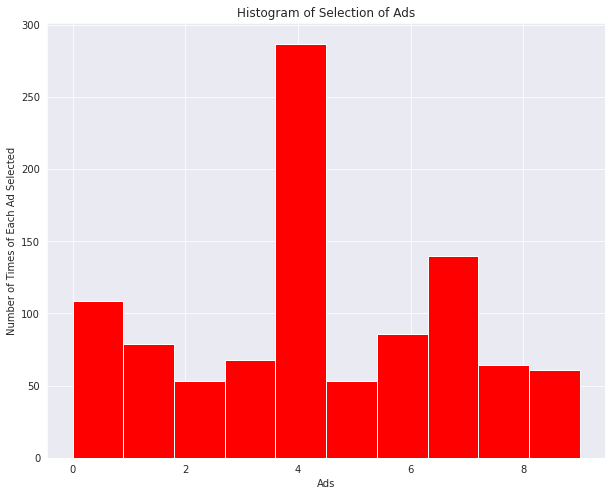

In [9]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
plt.hist(ads_selected,color = "red")
plt.title("Histogram of Selection of Ads")
plt.xlabel("Ads")
plt.ylabel("Number of Times of Each Ad Selected")
plt.show()

<font color="red">
The 4.th app has the highest change to be clicked by the customers

<font color="red">
Lets try 500 rounds

In [10]:
N = 500 #Number of instances we have 10000 in our dataset
d = 10 #Full list of ads that are selected over the rounds, it will start from 0 and gets bigger and will be 10000 at the end
ads_selected = [] #numbers of rime each ad is selected, it is is initilaized
numbers_of_selections = [0] * d # sums of rewards of the ad i to round n
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = df.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

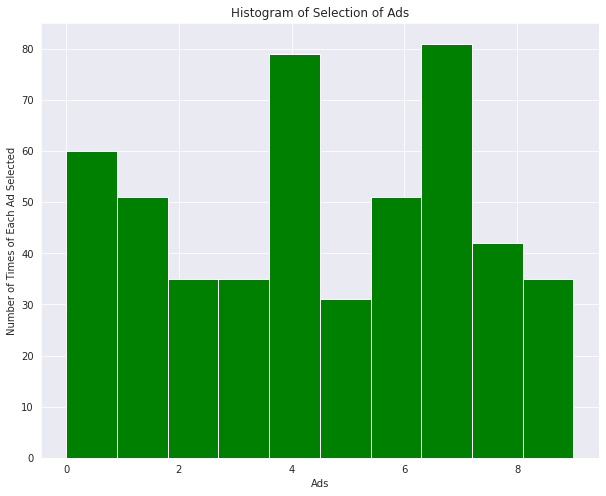

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
plt.hist(ads_selected,color = "green")
plt.title("Histogram of Selection of Ads")
plt.xlabel("Ads")
plt.ylabel("Number of Times of Each Ad Selected")
plt.show()

<font color="green">
The 4.th app does not seem to have the highest change to be clicked by the customers, and the 7.th ad becomes the first ad. Therefore, we understand that we need at least 1000 or more round to get the true result of Upper Confidence Bound Algorithm. Otwerwise, we will get wrong outcomes.

## 2. How Thomson Sampling Works:

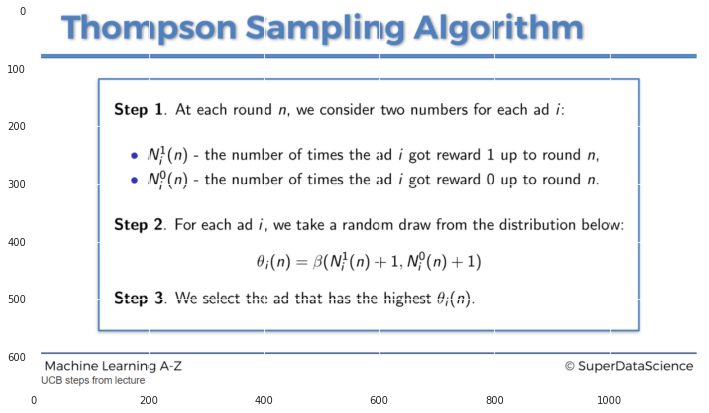

In [12]:
plt.figure(figsize=(12,10))
plt.imshow(plt.imread("../input/thompson/tamson.PNG"))

<font color = "blue">
In probability theory and statistics, the beta distribution is a family of continuous probability distributions defined on the interval [0, 1] parameterized by two positive shape parameters, denoted by α and β, that appear as exponents of the random variable and control the shape of the distribution.

 we will use random.betavariate()for this purposed which is an inbuilt method of the random module. It is used to return a random floating point number with beta distribution. The returned value is between 0 and 1.

In [13]:
import random
alfa = 5
beta =10
random.betavariate(alfa,beta)

0.3218379604195001

In [14]:
alfa = 5
beta = 1
random.betavariate(alfa,beta)

0.6107924921350752

In [15]:
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = df.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

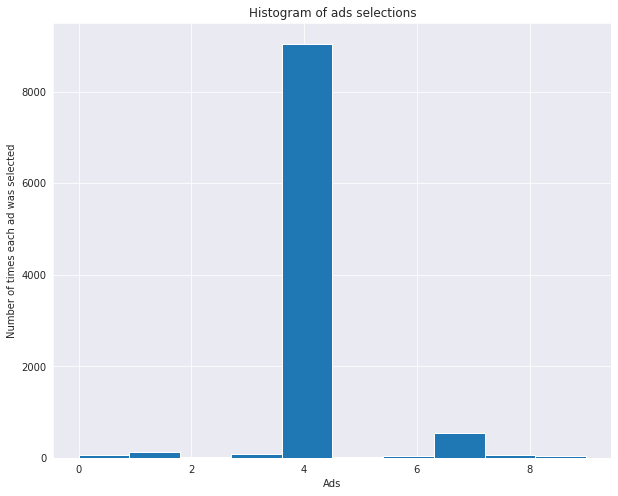

In [16]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

<font color="blue">
The 4.th app has clearly the highest change to be clicked by the customers.

In [17]:
N = 1000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = df.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

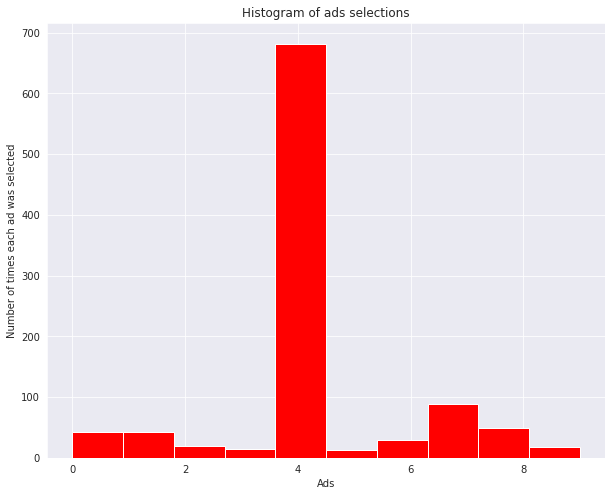

In [18]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
plt.hist(ads_selected, color="red")
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

<font color="red">
The 4.th app has clearly the highest change to be clicked by the customers in 1000 rounds and Thompson Sampling gives the clearer outcome.

In [19]:
N = 500
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = df.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

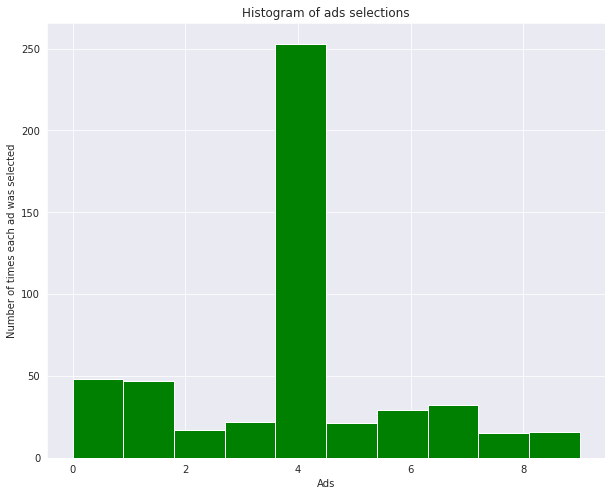

In [20]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
plt.hist(ads_selected, color="green")
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

<font color="green">
The 4th ad is still most clicked ad by the customers and Thompson Sampling outperforms Upper Confidence Bound Algorithm